### Implementing simple Chatbot Using LangGraph

In [7]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

##Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [8]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [10]:
# from langchain_openai import ChatOpenAI
# llm=ChatOpenAI(model="gpt-4o")
# llm.invoke("Hello")

In [15]:
from langchain_groq import ChatGroq


llm_groq = ChatGroq(model="llama-3.1-8b-instant")
llm_groq.invoke("Hey I am vinod and i like to play cricket")


AIMessage(content="Hi Vinod, nice to meet you. Cricket is a fantastic sport, and I'm sure you enjoy playing it. Are you a fan of any particular team or player? Do you have a favorite position to bat or bowl in?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 46, 'total_tokens': 94, 'completion_time': 0.069198199, 'prompt_time': 0.002091709, 'queue_time': 0.053938671, 'total_time': 0.071289908}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--cd8ee3e7-3f5d-4a1c-ad17-870e94a9fcf4-0', usage_metadata={'input_tokens': 46, 'output_tokens': 48, 'total_tokens': 94})

### Creating Nodes

In [16]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state["messages"])]}

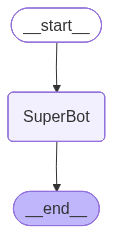

In [17]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [19]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is vinod And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is vinod And I like cricket', additional_kwargs={}, response_metadata={}, id='cbdad38f-2ea2-4837-b9da-30da93357735'),
  AIMessage(content="Hello Vinod. It's great to meet someone who enjoys cricket. Which team do you support? Are you a fan of Indian cricket or do you like another international team?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 46, 'total_tokens': 82, 'completion_time': 0.055474745, 'prompt_time': 0.00207794, 'queue_time': 0.05437628, 'total_time': 0.057552685}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--387fdbda-27ac-4dc3-bca3-a8f0c36b4671-0', usage_metadata={'input_tokens': 46, 'output_tokens': 36, 'total_tokens': 82})]}

#### Streaming The responses

In [20]:
for event in graph_builder.stream({"messages":"Hello My name is vinod"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Nice to meet you, Vinod. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 41, 'total_tokens': 65, 'completion_time': 0.031102142, 'prompt_time': 0.002193284, 'queue_time': 0.051737966, 'total_time': 0.033295426}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--b184511f-e5b2-423c-b10e-d5287dc344e6-0', usage_metadata={'input_tokens': 41, 'output_tokens': 24, 'total_tokens': 65})]}}


In [21]:
for event in graph_builder.stream({"messages":"Hello My name is vinod"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is vinod', additional_kwargs={}, response_metadata={}, id='96678439-f40b-429b-82b0-f7b75e89df9d')]}
{'messages': [HumanMessage(content='Hello My name is vinod', additional_kwargs={}, response_metadata={}, id='96678439-f40b-429b-82b0-f7b75e89df9d'), AIMessage(content="Hello Vinod, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.031616993, 'prompt_time': 0.001872737, 'queue_time': 0.056017563, 'total_time': 0.03348973}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--83897724-088d-46e6-80c5-caa3a0601eb5-0', usage_metadata={'input_tokens': 41, 'output_tokens': 27, 'total_tokens': 68})]}


In [23]:
for event in graph_builder.stream({"messages":"Hello My name is vinod"},stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Vinod, it's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 41, 'total_tokens': 60, 'completion_time': 0.020092005, 'prompt_time': 0.002446774, 'queue_time': 0.052055956, 'total_time': 0.022538779}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--078ed36d-3352-40c2-aad3-99cd2d4f3482-0', usage_metadata={'input_tokens': 41, 'output_tokens': 19, 'total_tokens': 60})]}}
